## Titanic Survival Predictions

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Data from titanic_train.csv file
train = pd.read_csv('titanic_train.csv')
# Reading Data from titanic_train.csv file
test = pd.read_csv('titanic_test.csv')

In [4]:
# Checking First five rows of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

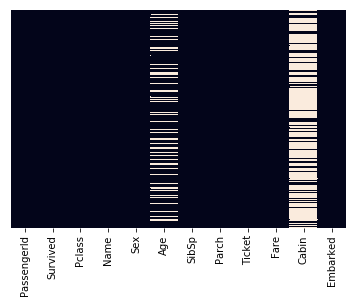

In [6]:
# heatmap for checking if there are any null values
sns.heatmap(data = train.isnull(),yticklabels=False,cbar=False)

From the above heatmap it is observed that there are alot of missing values in Cabin and Age column
So the next task is to fill inthose missing values

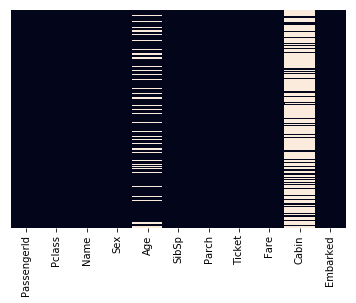

In [7]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

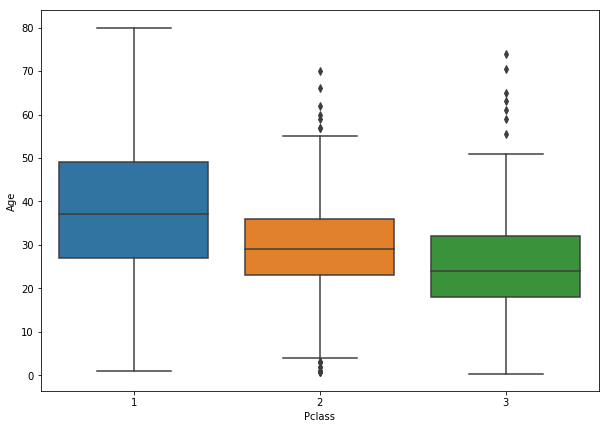

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x=train['Pclass'],y=train['Age'])

from above observation it is clear that passenger older in age tends to occupy the 1st class which makes sense.
from above we can conclude an age  for a passenger based off of their Pclass

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 22
    else:
        return Age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis = 1)

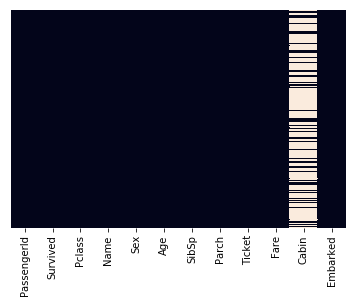

In [13]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

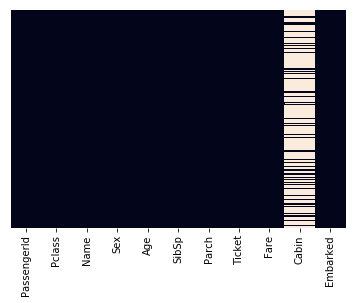

In [14]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

We have succesfully filled in the missing values in our Age column

In [15]:
train.drop('Cabin',inplace=True,axis=1)
test.drop('Cabin',inplace=True,axis=1)

In [16]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex = pd.get_dummies(test['Sex'],drop_first=True)

In [17]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
embarked = pd.get_dummies(test['Embarked'],drop_first=True)

In [18]:
train.drop(['Name','Embarked','Sex','Ticket'],axis=1,inplace=True)
test.drop(['Name','Embarked','Sex','Ticket'],axis=1,inplace=True)

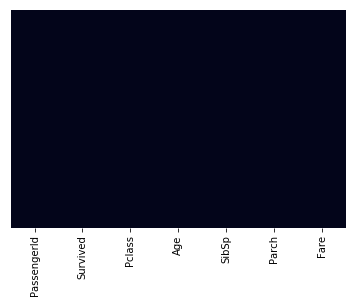

In [19]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

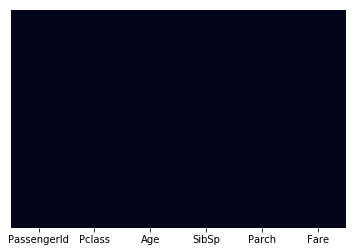

In [20]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

Adding our embarked and sex column into train dataset to make our final dataset

In [21]:
train_final = pd.concat([train,embarked,sex],axis=1)
test_final = pd.concat([test,embarked,sex],axis=1)

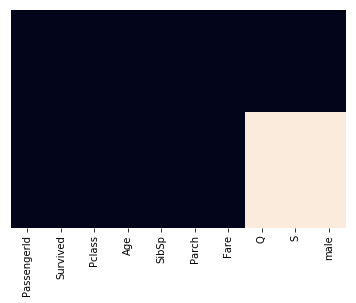

In [38]:
sns.heatmap(train_final.isna(),cbar=False,yticklabels=False)

In [47]:
# Checking the head of our final dataset
train_final.sample(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
307,308,1,1,17.0,1,0,108.9000,0.0,1.0,1.0
391,392,1,3,21.0,0,0,7.7958,0.0,1.0,0.0
230,231,1,1,35.0,1,0,83.4750,0.0,1.0,1.0
838,839,1,3,32.0,0,0,56.4958,NaN,NaN,NaN
845,846,0,3,42.0,0,0,7.5500,NaN,NaN,NaN
523,524,1,1,44.0,0,1,57.9792,NaN,NaN,NaN
425,426,0,3,22.0,0,0,7.2500,NaN,NaN,NaN
11,12,1,1,58.0,0,0,26.5500,0.0,1.0,1.0
758,759,0,3,34.0,0,0,8.0500,NaN,NaN,NaN
315,316,1,3,26.0,0,0,7.8542,1.0,0.0,0.0


In [23]:
test_final.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,1
4,896,3,22.0,1,1,12.2875,0,1,0


In [57]:
# train_final['Q'].max()

In [71]:
train_final.fillna(value={'male':1,'S':1,'Q':1},inplace=True)

In [70]:
test_final.fillna(value={'male':1,'S':1,'Q':1},inplace=True)

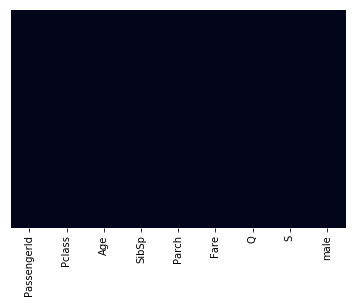

In [116]:
sns.heatmap(test_final.isnull(),cbar=False,yticklabels=False)

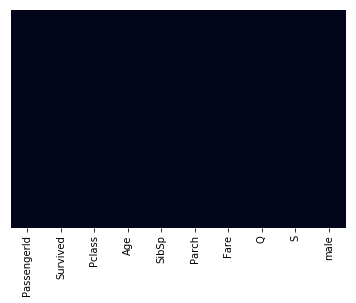

In [99]:
sns.heatmap(train_final.isnull(),cbar=False,yticklabels=False)

Now moving towards our ML part

In [100]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
X = train_final.drop(['Survived','PassengerId'],axis=1)
y = train_final['Survived']

In [102]:
sc = StandardScaler()

In [103]:
X = sc.fit_transform(X)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rfc = RandomForestClassifier(n_estimators=500,random_state=0)

In [107]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [108]:
rfc_pred = rfc.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

In [165]:
rfc_acc = round(accuracy_score(y_test,rfc_pred)*100,2)
print('Accuracy:',rfc_acc,'%')

Accuracy: 73.13 %


## Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [113]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
dtree_pred = dtree.predict(X_test)

In [164]:
dtree_acc = round(accuracy_score(y_test,dtree_pred)*100,2)
print('Accuracy:',dtree_acc,'%')

Accuracy: 67.91 %


## SVC

In [118]:
from sklearn.svm import SVC

In [119]:
svc = SVC()

In [120]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
svc_pred = svc.predict(X_test)

In [163]:
svc_acc = round(accuracy_score(y_test,svc_pred)*100,2)
print('Accuracy:',svc_acc,'%')

Accuracy: 73.88 %


## Linear SVC

In [123]:
from sklearn.svm import LinearSVC

In [124]:
lin_svc = LinearSVC()

In [125]:
lin_svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [126]:
lin_svc_pred = lin_svc.predict(X_test)

In [162]:
lin_svc_acc = round(accuracy_score(y_test,lin_svc_pred)*100,2)
print('Accuracy:',lin_svc_acc,'%')

Accuracy: 72.01 %


## Perceptron

In [128]:
from sklearn.linear_model import Perceptron

In [129]:
perceptron = Perceptron()

In [130]:
perceptron.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [131]:
perceptron_pred = perceptron.predict(X_test)

In [161]:
perc_acc = round(accuracy_score(y_test,perceptron_pred)*100,2)
print('Accuracy:',perc_acc,'%')

Accuracy: 64.18 %


## Gaussian Naive Bayes 

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
gnb = GaussianNB()

In [135]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [136]:
gnb_pred = gnb.predict(X_test)

In [160]:
gnb_acc = round(accuracy_score(y_test,gnb_pred)*100,2)
print('Accuracy:',gnb_acc,'%')

Accuracy: 70.15 %


## Stochastic Gradient Descent

In [138]:
from sklearn.linear_model import SGDClassifier

In [139]:
sgd = SGDClassifier()

In [140]:
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [141]:
sgd_pred = sgd.predict(X_test)

In [159]:
sgd_acc = round(accuracy_score(y_test,sgd_pred)*100,2)
print('Accuracy:',sgd_acc,'%')

Accuracy: 63.81 %


## Gradient Boosting Classifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
gbc = GradientBoostingClassifier()

In [145]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [146]:
gbc_pred = gbc.predict(X_test)

In [158]:
gbc_acc = round(accuracy_score(y_test,gbc_pred)*100,2)
print('Accuracy:',gbc_acc,'%')

Accuracy: 73.13 %


## KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn = KNeighborsClassifier(n_neighbors=2)

In [150]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [152]:
knn_pred = knn.predict(X_test)

In [166]:
knn_acc = round(accuracy_score(y_test,knn_pred)*100,2)
print('Accuracy:',acc_knn,'%')

Accuracy: 66.79 %


In [167]:
models = pd.DataFrame({
    'Models': ['Random Forest Classifier','Decision Tree Classifier','Support Vector Machines',
               'Linear SVC','Perceptron','Gaussian Naive Bayes', 'Stochastic Gradient Descent',
               'Gradient Boosting Classifier', 'KNN'],
    'Acc_Score':[rfc_acc,dtree_acc,svc_acc,lin_svc_acc,
                 perc_acc,gnb_acc,sgd_acc,gbc_acc,knn_acc]
})

In [169]:
models.sort_values(by='Acc_Score')

,Models,Acc_Score
6,Stochastic Gradient Descent,63.81
4,Perceptron,64.18
8,KNN,66.79
1,Decision Tree Classifier,67.91
5,Gaussian Naive Bayes,70.15
3,Linear SVC,72.01
0,Random Forest Classifier,73.13
7,Gradient Boosting Classifier,73.13
2,Support Vector Machines,73.88


In [171]:
# #set IDs as PassengerId and predict survival 
# IDs = test_final['PassengerId']
# predictions = svc.predict(test_final.drop('PassengerId', axis=1))

# #set the result as a dataframe and convert to csv file named submission.csv
# result = pd.DataFrame({ 'PassengerId' : IDs, 'Survived': predictions })
# result.to_csv('my_submission.csv', index=False)

## Thank You .....

### This is my first submission on kaggle consider upvoting if you like it